# Road Condition Prediction Using Machine Learning
**AAI - 530 : Final Team Project**  
**Submitted to:** Prof. Ana Marbut  
**University of San Diego**  

## Introduction

This project focuses on **Road Condition Prediction Using Machine Learning**, leveraging different deep learning models to classify road surfaces based on vehicle sensor data. The primary goal is to enhance road safety by accurately predicting surface conditions such as **asphalt, cobblestone, and dirt**.

We experimented with **GRU (Gated Recurrent Units)**, **LSTM (Long Short-Term Memory)**, and **Random Forest**, analyzing their performance in predicting road types based on historical vehicle data. Our work also includes **data cleaning, exploratory data analysis (EDA), and model evaluation** to ensure high accuracy.

### **Project Objectives**
- Predict road surface conditions using **sensor and vehicle telemetry data**.
- Compare the performance of **GRU, LSTM, and Random Forest** models.
- Identify key patterns in road conditions using machine learning techniques.
- Visualize results and model performance using **Tableau dashboards**.
- Explore future improvements, such as **vehicle speed behavior analysis**.

### **Repository & Resources**
- 📂 **GitHub Repository**: [Final-Team-Project-ML-IoT-Application](https://github.com/issa-ennab/Final-Team-Project-ML-IoT-Application)
- 📊 **Tableau Dashboard**: *([Tableau Dashboard](https://public.tableau.com/views/Final-Team-Project-ML-IoT-Application/Dashboard1?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link))*
- 🗄️ **Source: Kaggle Dataset**: *([Dataset](https://www.kaggle.com/code/jefmenegazzo/pvs-data-exploration))*
- 📝 **Contributors**:  
  - Issa Ennab  
  - Manikanta Katuri  
  - Ajmal Jalal  

### **Project Overview**

<img src="../docs/Introduction.png" alt="Image Description" width="1000"/>


## IoT System Design

### Edge-Based Vehicular IoT System for Real-Time Safety & Data Processing

This IoT system is designed primarily for vehicular edge computing, enabling real-time data processing and enhanced road safety. However, future enhancements introduce a hybrid approach, integrating both edge and cloud computing to optimize data collection, analysis, and transmission of critical vehicle and environmental data.

### System Components

#### 1️⃣ Edge Computing & Sensors
The system collects real-time data from multiple onboard sensors, each playing a vital role:
- **GPS Sensor (Xiaomi Mi 8, 1 Hz)** → Captures speed, latitude, longitude, and elevation.
- **Accelerometer (MPU-9250, 100 Hz)** → Measures vehicle acceleration.
- **Gyroscope (MPU-9250, 100 Hz)** → Tracks rotational movements.
- **Magnetometer (MPU-9250, 100 Hz)** → Detects ambient geomagnetic fields.
- **Temperature Sensor (MPU-9250, 100 Hz)** → Monitors temperature fluctuations.
- **HD Camera (HP Webcam HD-4110, 30 Hz)** → Captures video footage.

#### 2️⃣ Data Processing & Storage
- **SD Card** → Stores raw sensor data for offline analysis.
- **Edge Computing Unit** → Processes data locally before transmission, reducing cloud dependency.

#### 3️⃣ Communication & Messaging
- **GPS Module** → Communicates with GPS satellites for precise location tracking.
- **LTE Module** → Sends data via HTTPS to the cloud. <span style="color:orange"><i>Suggested Future Enhancements</i></span>
- **MQTT Messaging** → Enables low-latency communication for alerts and real-time updates. <span style="color:orange"><i>Suggested Future Enhancements</i></span>

#### 4️⃣ Cloud Computing & Integration <span style="color:orange"><i>Suggested Future Enhancements</i></span>
- **AWS IoT Core / Azure IoT Hub / Google Cloud IoT** → Centralized data aggregation, analytics, and remote monitoring.
- **Road & Safety City Systems** → Processes hazard alerts for traffic management and infrastructure planning.

### Existing System <span style="color:black"><i>Black (Solid Lines):</i></span>
The current implementation supports edge-based data collection and storage, with GPS tracking and LTE-based cloud communication.

### Future Enhancements <span style="color:orange"><i>Orange (Dashed Lines):</i></span>
- **Hazard Detection & Alerting** → Sensors detect road hazards (e.g., icy roads, sharp braking, high vibrations) and trigger alerts.
- **Vehicle-to-Vehicle (V2V) Communication** → Uses MQTT to broadcast alerts to nearby vehicles, enhancing proactive safety.
- **Enhanced Cloud Integration** → GPS data will be re-routed to cloud platforms, enabling long-term tracking & analytics.

### Why This Matters
This edge-based IoT system allows vehicles to process data locally while maintaining critical cloud connectivity for remote monitoring & future improvements. With V2V communication and hazard detection, this system has the potential to revolutionize real-time traffic safety and road condition awareness.

### <span style="color:lightblue"><strong>IoT System Diagram</strong><span>
<img src="../docs/Edge-Based-Vehicular-loT-System-Design.png" alt="Image Description" width="1000"/>

## Data Exploration & Cleaning

Before building our machine learning models, we first need to explore and clean our dataset. This involves:

- Understanding the structure of the dataset.
- Identifying missing or inconsistent data.
- Performing feature selection and engineering.
- Preparing the data for model training.

We will walk through the key steps of **data cleaning**, explaining the transformations and justifications behind them. The dataset contains sensor readings from multiple sources, which will be preprocessed to ensure consistency and accuracy.

Next, we will begin our **Exploratory Data Analysis (EDA)** to visualize key trends and distributions before proceeding to model training.

## 📥 Loading the Dataset


The dataset comprises **nine experiments**, each representing a **vehicle-driven route on mixed road types** (asphalt, cobblestone, dirt). The experiments were conducted using **three different vehicles** across **three scenarios**:

| Experiment | Vehicle              | Scenario  |
|------------|-----------------------|------------|
| PVS 1-3    | Volkswagen Saveiro    | Scenario 1, 2, 3 |
| PVS 4-6    | Fiat Bravo            | Scenario 1, 2, 3 |
| PVS 7-9    | Fiat Palio            | Scenario 1, 2, 3 |

Each experiment contains sensor data (accelerometers, gyroscopes, magnetometers), GPS readings, and labeled road conditions.  
To **facilitate future analysis and comparisons**, we **merged all experiments into a single master dataset**. During this process, we **appended three additional fields**:

- `experiment_id`: Identifies the source experiment (e.g., PVS 1, PVS 2…)
- `vehicle`: Identifies the vehicle used (e.g., Volkswagen Saveiro)
- `scenario`: Denotes the scenario number (e.g., Scenario 1)

This allows us to **filter by vehicle, scenario, or experiment** later for **comparative analysis** or **model evaluation**.


In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
from IPython.display import display

In [51]:
# Base directory containing the PVS folders
base_dir = 'dataset/'

# Vehicle and scenario mapping based on the provided table
experiment_metadata = {
    'PVS 1': {'vehicle': 'Volkswagen Saveiro', 'scenario': 'Scenario 1'},
    'PVS 2': {'vehicle': 'Volkswagen Saveiro', 'scenario': 'Scenario 2'},
    'PVS 3': {'vehicle': 'Volkswagen Saveiro', 'scenario': 'Scenario 3'},
    'PVS 4': {'vehicle': 'Fiat Bravo', 'scenario': 'Scenario 1'},
    'PVS 5': {'vehicle': 'Fiat Bravo', 'scenario': 'Scenario 2'},
    'PVS 6': {'vehicle': 'Fiat Bravo', 'scenario': 'Scenario 3'},
    'PVS 7': {'vehicle': 'Fiat Palio', 'scenario': 'Scenario 1'},
    'PVS 8': {'vehicle': 'Fiat Palio', 'scenario': 'Scenario 2'},
    'PVS 9': {'vehicle': 'Fiat Palio', 'scenario': 'Scenario 3'},
}

# Empty list to collect dataframes
all_dataframes = []

In [52]:
# mpu_left = pd.read_csv('dataset/PVS 1/dataset_mpu_left.csv')

# Iterate over each PVS folder
for pvs_id, meta in experiment_metadata.items():
    folder_path = os.path.join(base_dir, pvs_id)

    # Load the relevant CSVs
    mpu_left = pd.read_csv(os.path.join(folder_path, 'dataset_mpu_left.csv'))
    mpu_right = pd.read_csv(os.path.join(folder_path, 'dataset_mpu_right.csv'))
    gps = pd.read_csv(os.path.join(folder_path, 'dataset_gps.csv'))
    labels = pd.read_csv(os.path.join(folder_path, 'dataset_labels.csv'))

    # Merge MPU Left and MPU Right on timestamp
    mpu_combined = pd.merge(mpu_left, mpu_right, on='timestamp', suffixes=('_left', '_right'))

    # Merge GPS with combined MPU
    merged_data = pd.merge(mpu_combined, gps, on='timestamp', how='left')

    # Merge with Labels
    merged_data = pd.merge(merged_data, labels, left_index=True, right_index=True, how='left')

    # Add experiment-level metadata
    merged_data['experiment_id'] = pvs_id
    merged_data['vehicle'] = meta['vehicle']
    merged_data['scenario'] = meta['scenario']

    # Collect dataframe
    all_dataframes.append(merged_data)

# Concatenate all experiment data into a master dataframe
master_df = pd.concat(all_dataframes, ignore_index=True)

## 🧾 Initial Dataset Summary

We analyzed the combined dataset, resulting in:
- **1,080,905 rows**
- **91 features**

The **merged dataset** is **saved as `master_dataset.csv`** for future use.

In [53]:
# Save as CSV for future use
master_df.to_csv('dataset/master_dataset.csv', index=False)

# Display a summary
print(f"Final Dataset Shape: {master_df.shape}")
print(master_df.head())

Final Dataset Shape: (1080905, 91)
      timestamp  acc_x_dashboard_left  acc_y_dashboard_left  \
0  1.577219e+09              0.365116              0.167893   
1  1.577219e+09              0.392649              0.176273   
2  1.577219e+09              0.409408              0.181062   
3  1.577219e+09              0.371101              0.164302   
4  1.577219e+09              0.390255              0.159514   

   acc_z_dashboard_left  acc_x_above_suspension_left  \
0              9.793961                     0.327626   
1              9.771216                     0.381496   
2              9.732909                     0.283333   
3              9.749668                     0.314458   
4              9.869378                     0.344385   

   acc_y_above_suspension_left  acc_z_above_suspension_left  \
0                     0.172733                     9.781861   
1                     0.189492                     9.699261   
2                     0.182310                     9.807000 

## 🧾 Dataset Summary

To better understand the structure and quality of the dataset used in this project, we generated a summary table highlighting key characteristics of each feature. This summary provides insights into the data types, non-null counts, and a quick overview of missing values, aiding in the data cleaning and preparation process.

In [54]:
# Prepare summary table
summary_data = [{
    'Dataset Name': 'master_dataset',
    'Number of Rows': master_df.shape[0],
    'Number of Columns': master_df.shape[1],
    'Duplicates': master_df.duplicated().sum(),
    'Missing Values': master_df.isnull().sum().sum(),
    'Sample Columns': ', '.join(master_df.columns[:5]) + ('...' if len(master_df.columns) > 5 else '')
}]

# Convert to DataFrame
summary_df = pd.DataFrame(summary_data)

# Display the summary as a clean DataFrame
display(summary_df)

,Dataset Name,Number of Rows,Number of Columns,Duplicates,Missing Values,Sample Columns
0,master_dataset,1080905,91,0,20443399,"timestamp, acc_x_dashboard_left, acc_y_dashboa..."


In [43]:
summary_df.to_csv('dataset/summary_master_dataset.csv', index=False)
# print(summary_df.to_markdown())

## Visualize Missing Values

We plotted the missing values, revealing that certain columns (latitude, longitude, accuracy, and GPS-related) had over 99% missing values. This led us to evaluate their relevance.

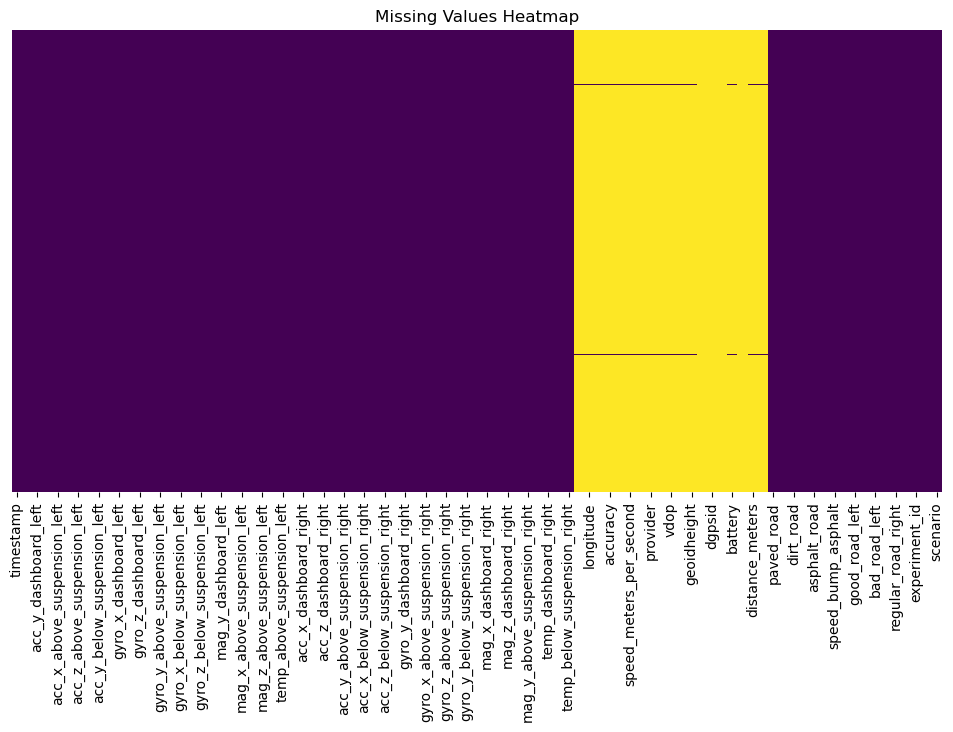

In [55]:
plt.figure(figsize=(12, 6))
sns.heatmap(master_df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [56]:
# Count non-null values for latitude, longitude, and accuracy
non_null_counts = master_df[['latitude', 'longitude', 'accuracy']].notnull().sum()
print(non_null_counts)

latitude     6254
longitude    6254
accuracy     6254
dtype: int64


## 🧹 Data Cleaning Process

As part of the data preparation process, we carefully examined the dataset for **missing values, duplicates, and irrelevant features**. Our approach was guided by both **statistical analysis** and **domain understanding**. Key decisions and steps are outlined below:

### 1. Handling Missing Values
Upon visualizing the missing values using a heatmap, we observed that several GPS-related columns (e.g., `latitude`, `longitude`, `accuracy`) contained **sparse data** (less than 1% non-null records). Such sparse features hold **little predictive value** and could introduce noise into the models.

- **Non-null Counts:**
  - `latitude`: 6254 (0.58%)
  - `longitude`: 6254 (0.58%)
  - `accuracy`: 6254 (0.58%)

These columns, along with other irrelevant fields, were **dropped** from the dataset.

### 2. Columns Removed:
| Column Name       | Reason for Removal                                    |
|-------------------|--------------------------------------------------------|
| `latitude`        | Sparse data (0.58%), irrelevant for vibration-based prediction |
| `longitude`       | Same as above                                          |
| `accuracy`        | Sparse data, related to GPS quality, not road condition |
| `bearing`         | Mostly null, GPS directional data, not required        |
| `geoidheight`     | Elevation reference, not predictive in our context     |
| `ageofdgpsdata`   | Sparse, not relevant                                   |
| `dgpsid`          | Sparse, not relevant                                   |
| `provider`        | Text data, carrier info, irrelevant                    |
| `annotation`      | Mostly null, likely for labeling, not predictive       |
| `battery`         | Battery level, not influencing road vibrations         |

### 3. Final Cleaned Dataset:
After removing the above columns, our **final dataset** consists of **81 features and 1,080,905 records**.

---

### 📊 Visual Summary
A heatmap of missing values confirmed that the removed columns had **large gaps**, validating our decision to **drop them**.


In [57]:
# Columns to remove based on missing values and irrelevance
cleaned_df = master_df.copy()
columns_to_drop = [
    'latitude', 'longitude', 'accuracy', 'bearing', 'geoidheight',
    'ageofdgpsdata', 'dgpsid', 'provider', 'annotation', 'battery'
]

# Drop the columns from the master dataframe
cleaned_df.drop(columns=columns_to_drop, inplace=True)

# Save the cleaned dataset
cleaned_df.to_csv('dataset/cleaned_master_dataset.csv', index=False)

# Confirm the changes
print(f"Final Dataset Shape After Dropping Columns: {cleaned_df.shape}")

Final Dataset Shape After Dropping Columns: (1080905, 81)


# Exploratory Data Analysis (EDA)

We aim to explore and analyze the dataset by performing initial data cleaning and generating key visualizations to understand the distribution and patterns in the data.

## Basic Descriptive Statistics
Summary statistics are calculated to understand the central tendency and spread of the data. This includes measures such as mean, median, and standard deviation.

In [58]:
# 1. Descriptive Statistics per Vehicle

# Calculate descriptive statistics for each vehicle
# This includes count, mean, std, min, 25%, 50%, 75%, and max for each sensor axis
descriptive_vehicle_stats = master_df.groupby('vehicle')[['acc_x_dashboard_left', 'acc_y_dashboard_left', 'acc_z_dashboard_left']].describe()

# Display the descriptive statistics
display(descriptive_vehicle_stats)

# Save the descriptive statistics to a CSV file
descriptive_vehicle_stats.to_csv('dataset/descriptive_vehicle_stats.csv')

acc_x_dashboard_left                                 \
                                  count      mean       std        min   
vehicle                                                                  
Fiat Bravo                     362648.0  0.257525  1.306369  -9.151631   
Fiat Palio                     343721.0  0.246039  1.314881  -8.111316   
Volkswagen Saveiro             374536.0  0.229567  1.429087 -10.735600   

                                                             \
                         25%       50%       75%        max   
vehicle                                                       
Fiat Bravo         -0.469503  0.226456  1.024479   7.599555   
Fiat Palio         -0.502543  0.225294  0.979468   8.826195   
Volkswagen Saveiro -0.495600  0.232597  0.964863  13.957495   

                   acc_y_dashboard_left            ...                       \
                                  count      mean  ...       75%        max   
vehicle                                            ...                        
Fiat Bravo                     362648.0 -0.145169  ...  0.683282  12.183075   
Fiat Palio                     343721.0 -0.144058  ...  0.758124  14.567608   
Volkswagen Saveiro             374536.0 -0.140564  ...  0.660022  18.276868   

                   acc_z_dashboard_left                                \
                                  count      mean       std       min   
vehicle                                                                 
Fiat Bravo                     362648.0  9.782362  1.289326 -1.027292   
Fiat Palio                     343721.0  9.823909  2.214910 -8.036258   
Volkswagen Saveiro             374536.0  9.788493  1.752436 -9.491693   

                                                              
                         25%       50%        75%        max  
vehicle                                                       
Fiat Bravo          9.205526  9.796894  10.385867  19.458144  
Fiat Palio          8.820064  9.825628  10.842023  34.504815  
Volkswagen Saveiro  9.029851  9.791207  10.558549  24.665544  

[3 rows x 24 columns]

In [59]:
# 2. Pivot Table - Aggregating Sensor Data per Vehicle and Scenario

# Create a pivot table to aggregate sensor data per vehicle and scenario
pivot_vehicle_scenario = master_df.pivot_table(
    values=['acc_x_dashboard_left', 'acc_y_dashboard_left', 'acc_z_dashboard_left'],
    index='vehicle',
    columns='scenario',
    aggfunc='mean'
)

# Display the pivot table
display(pivot_vehicle_scenario)

# Save the pivot table to a CSV file
pivot_vehicle_scenario.to_csv('dataset/pivot_vehicle_scenario.csv')

acc_x_dashboard_left                        \
scenario                     Scenario 1 Scenario 2 Scenario 3   
vehicle                                                         
Fiat Bravo                    -0.136552   0.516208   0.440124   
Fiat Palio                    -0.223821   0.576928   0.458980   
Volkswagen Saveiro            -0.171308   0.617304   0.318362   

                   acc_y_dashboard_left                        \
scenario                     Scenario 1 Scenario 2 Scenario 3   
vehicle                                                         
Fiat Bravo                    -0.036261  -0.242636  -0.159512   
Fiat Palio                     0.019999  -0.270474  -0.203715   
Volkswagen Saveiro             0.015106  -0.239721  -0.235623   

                   acc_z_dashboard_left                        
scenario                     Scenario 1 Scenario 2 Scenario 3  
vehicle                                                        
Fiat Bravo                     9.734223   9.810991   9.808799  
Fiat Palio                     9.710462   9.910696   9.866013  
Volkswagen Saveiro             9.719331   9.828431   9.835577

In [60]:
# Identify the top 10 lowest Z-axis vibrations (negative spikes)
outliers_low_vibration = master_df[['timestamp', 'vehicle', 'acc_z_dashboard_left']].nsmallest(10, 'acc_z_dashboard_left')

# Display the negative spikes
display(outliers_low_vibration)

# Save the negative spikes to a CSV file
outliers_low_vibration.to_csv('dataset/outliers_low_vibration.csv')

,timestamp,vehicle,acc_z_dashboard_left
310749,1.577224e+09,Volkswagen Saveiro,-9.491693
1017381,1.577399e+09,Fiat Palio,-8.036258
1010754,1.577399e+09,Fiat Palio,-7.274901
915887,1.577398e+09,Fiat Palio,-6.823650
914100,1.577398e+09,Fiat Palio,-6.644085
113080,1.577220e+09,Volkswagen Saveiro,-6.418376
887271,1.577397e+09,Fiat Palio,-6.143697
917082,1.577398e+09,Fiat Palio,-5.928218
950936,1.577398e+09,Fiat Palio,-5.734288
1021451,1.577399e+09,Fiat Palio,-5.388271


## Speed Distribution by Vehicle
This visualization shows the distribution of vehicle speeds across different vehicle types. The KDE plot provides insight into the variability in speed for each vehicle.

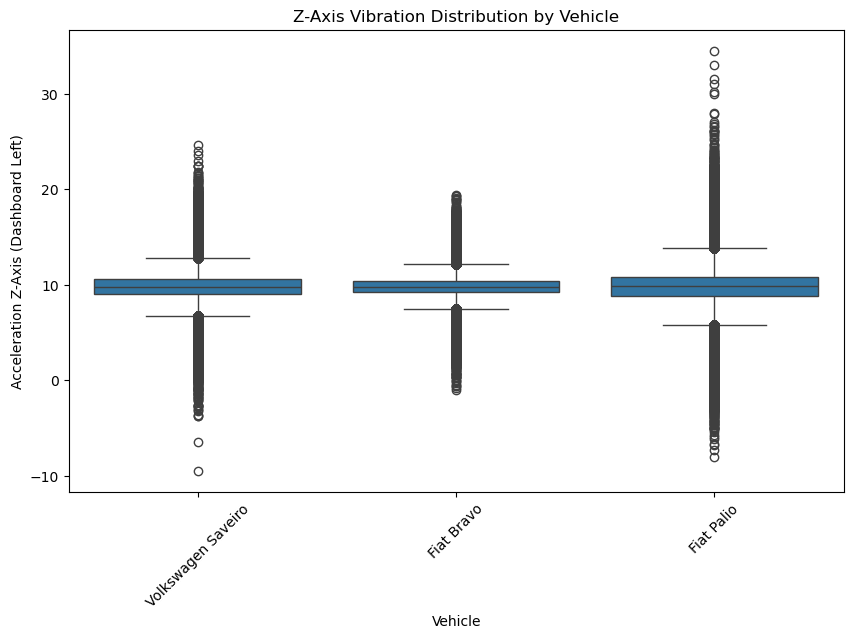

In [61]:
# 5. Visualization Example (Acceleration Z-Axis Distribution by Vehicle)

plt.figure(figsize=(10, 6))
sns.boxplot(x='vehicle', y='acc_z_dashboard_left', data=master_df)
plt.title('Z-Axis Vibration Distribution by Vehicle')
plt.xlabel('Vehicle')
plt.ylabel('Acceleration Z-Axis (Dashboard Left)')
plt.xticks(rotation=45)
plt.show()

,count,mean,std,min,25%,50%,75%,max
vehicle,,,,,,,,
Fiat Bravo,1766.0,10.204735,7.230223,0.003605,4.926013,7.534049,15.277126,28.548570
Fiat Palio,2108.0,11.288145,7.682918,0.001763,5.947153,8.242473,19.318575,25.690508
Volkswagen Saveiro,2380.0,9.178896,6.604133,0.003594,4.592874,6.591118,14.241782,23.584063


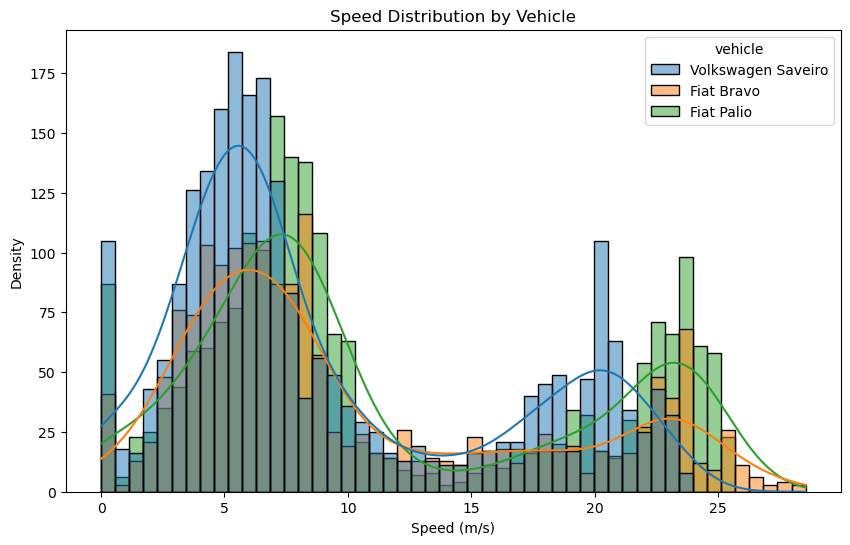

In [63]:
# 7. Speed Distribution by Vehicle
speed_distribution_vehicle = master_df.groupby('vehicle')['speed_meters_per_second'].describe()
display(speed_distribution_vehicle)

plt.figure(figsize=(10, 6))
sns.histplot(data=master_df, x='speed_meters_per_second', hue='vehicle', kde=True, bins=50)
plt.title('Speed Distribution by Vehicle')
plt.xlabel('Speed (m/s)')
plt.ylabel('Density')
plt.show()